Check the performance based on naive phrase similarity

In [1]:
% cd /home/mayu-ot/durga/Experiments/loc_iparaphrasing/

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing


In [17]:
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score

In [2]:
val_df = pd.read_csv('data/phrase_pair_val.csv')
test_df = pd.read_csv('data/phrase_pair_test.csv')

In [3]:
val_df.head()

,Unnamed: 0,image,phrase1,phrase2,original_phrase1,original_phrase2,ytrue,roi1,roi2
0,0,100652400,man,hard+hat,A man,a hard hat,False,116,-1
1,1,100652400,man,caution+vest,A man,a caution vest,False,116,-1
2,2,100652400,man,street,A man,the street,False,116,21
3,3,100652400,man,orange+flag,A man,an orange flag,False,116,-1
4,4,100652400,blue+hard+hat,man,a blue hard hat,A man,False,-1,116


In [4]:
def lang_iou(x, y):
    x = set(x.split('+'))
    y = set(y.split('+'))
    inter = x.intersection(y)
    union = x.union(y)
    iou = len(inter) / len(union)
    return iou

for df in [val_df, test_df]:
    p_ious = []
    for _, row in df.iterrows():
        p_iou = lang_iou(row.phrase1, row.phrase2)
        p_ious.append(p_iou)

    df['p_ious'] = np.asarray(p_ious)

In [16]:
# determine threshold on validation set
prec, rec, thresh = precision_recall_curve(val_df.ytrue, val_df.p_ious)
f1 = 2 * (prec * rec) / (prec + rec)
best_idx = np.nanargmax(f1)
best_thresh = thresh[best_idx]
print('best f1: %.2f prec: %.2f rec: %.2f' % (f1[best_idx] * 100, prec[best_idx] * 100, rec[best_idx] * 100))

best f1: 61.70 prec: 74.70 rec: 52.56


(0.0, 1.0)

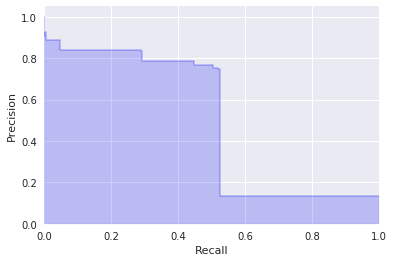

In [15]:
plt.step(rec, prec, color='b', alpha=0.2,
         where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [20]:
# eval test set using pre-computed threshold
pred = test_df.p_ious > best_thresh
prec = precision_score(test_df.ytrue, pred)
rec = recall_score(test_df.ytrue, pred)
f1 = f1_score(test_df.ytrue, pred)
print('f1: %.2f prec: %.2f rec: %.2f' % (f1 * 100, prec * 100, rec * 100))

f1: 61.25 prec: 74.15 rec: 52.18


In [21]:
best_thresh

0.1111111111111111

(0.0, 1.0)

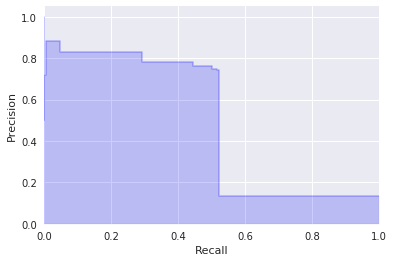

In [22]:
prec, rec, thresh = precision_recall_curve(test_df.ytrue, test_df.p_ious)
plt.step(rec, prec, color='b', alpha=0.2,
         where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])